In [2]:
import sys
sys.path.insert(0, '../')

In [3]:
from skimage import io
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read input image
img = io.imread("../data/003_0.bmp")

# reshape the pixels matrix and nomalize it
# (height, width, channel) -> (height * width, channel)
pixels = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2])) / 255

# SOM initialization and training
print("training...")
som = MiniSom(4, 4, img.shape[2], sigma=1.0,
             learning_rate=0.1, neighborhood_function='gaussian') # 4x4 = 16 final colors
#som.random_weights_init(pixels)

# initialize SOM's wieghts with PCA technique (to span the first two principal components)
# it seems that using this gets stable result
som.pca_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights

# train SOM by picking samples at random from data
# and set maximum iteration to 500
som.train_random(pixels, 500, verbose=True) 

training...


 [ 500 / 500 ] 100% - 0.00038 it/s

 - quantization error: 0.05227969952903407


In [5]:
print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(img.shape[0], img.shape[1]))] = q
print('done.')

quantization...
building new image...


/usr/local/anaconda3/envs/fishClassifier/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


done.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


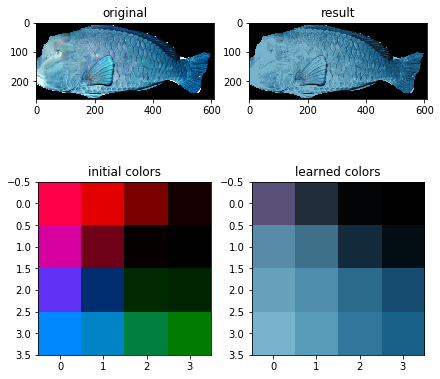

In [6]:
# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

In [7]:
# print starting and learned weights
# each row of the list represents the pixel value (color) of certain element
print("before learning")
print(starting_weights)
print("\nafter learning")
print(som.get_weights())

before learning
[[[ 1.29780615 -0.48517044  0.28338813]
  [ 0.89324494 -0.5026     -0.24620688]
  [ 0.48868372 -0.52002957 -0.77580189]
  [ 0.08412251 -0.53745913 -1.30539691]]

 [[ 0.83716327 -0.14429391  0.62405772]
  [ 0.43260205 -0.16172348  0.09446271]
  [ 0.02804084 -0.17915304 -0.4351323 ]
  [-0.37652038 -0.19658261 -0.96472732]]

 [[ 0.37652038  0.19658261  0.96472732]
  [-0.02804084  0.17915304  0.4351323 ]
  [-0.43260205  0.16172348 -0.09446271]
  [-0.83716327  0.14429391 -0.62405772]]

 [[-0.08412251  0.53745913  1.30539691]
  [-0.48868372  0.52002957  0.77580189]
  [-0.89324494  0.5026      0.24620688]
  [-1.29780615  0.48517044 -0.28338813]]]

after learning
[[[3.51038392e-01 3.18912274e-01 4.70980026e-01]
  [1.33162248e-01 1.79359878e-01 2.34130903e-01]
  [8.13472022e-03 1.75589232e-02 2.45019756e-02]
  [2.82519944e-04 1.84508271e-03 2.86865942e-03]]

 [[3.46484990e-01 5.49676707e-01 6.54103101e-01]
  [2.48336902e-01 4.40765417e-01 5.43477949e-01]
  [7.15813078e-02 1.6743

In [8]:
ending_weights = som.get_weights()
a = np.asarray(ending_weights)
a = a.reshape(1, 3 * 4 * 4)
a

array([[3.51038392e-01, 3.18912274e-01, 4.70980026e-01, 1.33162248e-01,
        1.79359878e-01, 2.34130903e-01, 8.13472022e-03, 1.75589232e-02,
        2.45019756e-02, 2.82519944e-04, 1.84508271e-03, 2.86865942e-03,
        3.46484990e-01, 5.49676707e-01, 6.54103101e-01, 2.48336902e-01,
        4.40765417e-01, 5.43477949e-01, 7.15813078e-02, 1.67438209e-01,
        2.26095181e-01, 1.39695790e-02, 5.37704943e-02, 8.09105035e-02,
        4.03558843e-01, 6.32777264e-01, 7.30640958e-01, 3.06865013e-01,
        5.58613898e-01, 6.77731102e-01, 1.78516760e-01, 4.19913245e-01,
        5.54903664e-01, 8.31542013e-02, 2.98661012e-01, 4.36665549e-01,
        4.68102836e-01, 7.08205516e-01, 7.97404240e-01, 3.45798019e-01,
        6.09409906e-01, 7.22557552e-01, 1.93213251e-01, 4.68788499e-01,
        6.12448710e-01, 1.02119612e-01, 3.82549836e-01, 5.43233001e-01]])

In [14]:
a_scaled = (a - a.min()) / (a.max() - a.min())
a_scaled

array([[0.440028  , 0.39972534, 0.5904964 , 0.16669942, 0.22465497,
        0.29336597, 0.00985069, 0.02167348, 0.03038364, 0.        ,
        0.00196026, 0.00324435, 0.43431569, 0.68922245, 0.82022678,
        0.31118758, 0.55259176, 0.68144603, 0.0894453 , 0.20969908,
        0.28328504, 0.0171706 , 0.06710139, 0.1011489 , 0.50591561,
        0.79347323, 0.91624456, 0.38461189, 0.70043428, 0.84986843,
        0.22359727, 0.52643243, 0.69577974, 0.10396365, 0.37431986,
        0.54744842, 0.58688693, 0.88809899, 1.        , 0.43345388,
        0.76415856, 0.90610382, 0.24203422, 0.5877471 , 0.76797078,
        0.12775601, 0.47955953, 0.68113874]])